In [1]:
import numpy as np
import matplotlib.pyplot as plt

An integrate-and-fire neuron receives inputs in form of a variable that represents either sinaptic current or conductance. Now the neuron is represented by:

$$\begin{align}
\frac{dV}{dt} &=-\frac{V-E}{\tau} - g_{syn}(V-E_{syn}) + I_{ext} \\
\frac{dg_{syn}}{dt} &= -\frac{g_{syn}}{\tau_{syn}} + A(t)  
\end{align}
$$
$$A\left(t\right)=\left\{\begin{matrix}W_{syn}\quad \text{if } t=t_{spike}\\0\quad \text{otherwise}\\\end{matrix}\right.$$
$$V_{t}\geq V_{th} \Rightarrow  V_{t+1}=V_{reset}$$

Not thag $t_{spike}$ stands for __presynaptic__ (input) spikes.

The following codes simulates a single neuron receiving the spikes whose times are stored in a list.
Again, the managing of the list is one possible idea among many others possible.

Text(0,0.5,'$I_{syn}$')

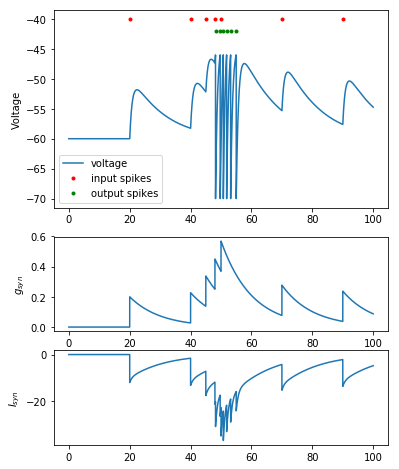

In [2]:
Vreset=-70; Vrep=-60
tau=1; th=-46
tau_syn=10; Esyn=0 # reversal potential corresponds to excitatory synapses

def LIF(X,I):
    v,gsyn=X
    return np.array([-(v-Vrep)/tau - gsyn*(v-Esyn)+ I,
                     -gsyn/tau_syn])

input_spikes=[20,40,45,48,50,70,90,1e6] #last value is needed to avoid an error when checking the next spike time. 

#To obtain the spike times one by one, we will use a Python 'iterator'. It will give the elements one by one when required.
in_spikes=iter(input_spikes)
next_spike=next(in_spikes)

Wsyn=0.2

Istim=0 #Stimulus

tstop=100; dt=0.01
time=np.arange(0,tstop,dt)

v=-60.
n=0.
X=np.array([v,n])
X_t=np.zeros((len(time),2)) #Store both voltage and g_syn

out_spikes=[]
for i,t in enumerate(time):
    X_t[i]=X
    X+=dt*LIF(X,Istim)
    
    if X[0]>=th:       #check for output (post-synaptic) spikes
        X[0] = Vreset
        out_spikes.append([t])
    if t>=next_spike:   # check for input (pre-synaptic) spikes
        X[1] = X[1] + Wsyn     #A synaptic input increases g_syn, but does not affect voltage directly.
        next_spike=next(in_spikes)
    

plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(time,X_t[:,0])
plt.ylabel("Voltage")
plt.plot(input_spikes[:-1],-40*np.ones_like(input_spikes[:-1]),'r.')
plt.plot(out_spikes,-42*np.ones_like(out_spikes),'g.')
plt.legend(("voltage","input spikes","output spikes"))

plt.subplot(413)
plt.plot(time,X_t[:,1])
plt.ylabel("$g_{syn}$")

plt.subplot(414)
plt.plot(time,X_t[:,1]*(X_t[:,0]-Esyn))
plt.ylabel("$I_{syn}$")
        

A sligth modification allows to simulate a ramdon input spike train, with a mean input rate and exponentially distributed intervals.

Text(0,0.5,'$I_{syn}$')

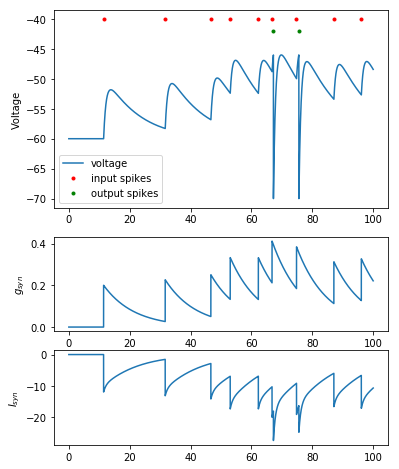

In [5]:
Vreset=-70; Vrep=-60
tau=1; th=-46
tau_syn=10; Esyn=0 # eversal potential corresponds to excitatory synapses

def LIF(X,I):
    v,gsyn=X
    return np.array([-(v-Vrep)/tau - gsyn*(v-Esyn)+ I,
                     -gsyn/tau_syn])

tstop=100; dt=0.01
time=np.arange(0,tstop,dt)

input_rate=0.1 #mean of spikes per millisecond
intervals=np.random.exponential(scale=1/input_rate,size=(int(tstop*input_rate)))
input_spikes=np.cumsum(intervals)
input_spikes=input_spikes[input_spikes<tstop]  # remove values larger than tstop
input_spikes=np.append(input_spikes,1e6) #last value is needed to avoid an error when checking the next spike time. 

#Iterator
in_spikes=iter(input_spikes)
next_spike=next(in_spikes)

Wsyn=0.2

Istim=0 #

v=-60.
n=0.
X=np.array([v,n])
X_t=np.zeros((len(time),2)) #Store voltage and g_syn

out_spikes=[]
for i,t in enumerate(time):
    X_t[i]=X
    X+=dt*LIF(X,Istim)
    
    if X[0]>=th:       #check output spikes
        X[0] = Vreset
        out_spikes.append([t])
    if t>=next_spike:   #check input spikes
        X[1] = X[1] + Wsyn 
        next_spike=next(in_spikes)
    

plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(time,X_t[:,0])
plt.ylabel("Voltage")
plt.plot(input_spikes[:-1],-40*np.ones_like(input_spikes[:-1]),'r.')
plt.plot(out_spikes,-42*np.ones_like(out_spikes),'g.')
plt.legend(("voltage","input spikes","output spikes"))

plt.subplot(413)
plt.plot(time,X_t[:,1])
plt.ylabel("$g_{syn}$")

plt.subplot(414)
plt.plot(time,X_t[:,1]*(X_t[:,0]-Esyn))
plt.ylabel("$I_{syn}$")

Another way of representing synapses is a difference of exponentials. This raises a second-order ODE, which needs an auxiliary variable to be solved:
$$\begin{align}
\frac{dV}{dt} &=-\frac{V-E}{\tau} - g_{syn}(V-E_{syn}) + I_{ext} \\
\frac{d^2g_{syn}}{dt^2}&=A\left(t\right)-\left(\frac{1}{\tau_1}+\frac{1}{\tau_2}\right)\frac{dg_{syn}}{dt} -\frac{g_{syn}}{\tau_1\tau_2} \\
\end{align}$$

In practice, this is solved as:

$$\begin{align}
\frac{dV}{dt} &=-\frac{V-E}{\tau} - g_{syn}(V-E_{syn}) + I_{ext} \\
\frac{dy}{dt}&=A\left(t\right)-\left(\frac{1}{\tau_1}+\frac{1}{\tau_2}\right)y -\frac{g_{syn}}{\tau_1\tau_2} \\
\frac{dg_{syn}}{dt}&=y\\
\end{align}$$

$$A\left(t\right)=\left\{\begin{matrix}W_{syn}\quad \text{if } t=t_{spike}\\0\quad \text{otherwise}\\\end{matrix}\right.$$
$$V_{t}\geq V_{th} \Rightarrow  V_{t+1}=V_{reset}$$


Text(0,0.5,'$I_{syn}$')

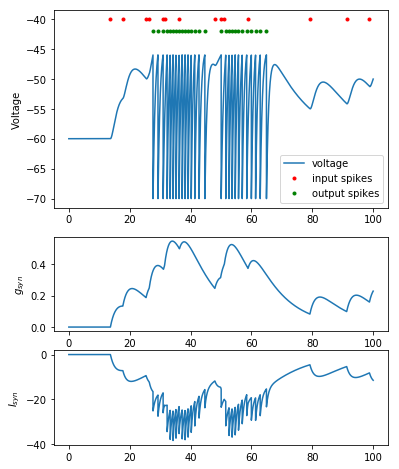

In [6]:
Vreset=-70; Vrep=-60
tau=1; th=-46
tsyn1=10.; Esyn=0 # el potencial de reversión indica sinapsis excitatoria
tsyn2=2.

def LIF(X,I):
    v,y,gsyn=X
    return np.array([-(v-Vrep)/tau - gsyn*(v-Esyn)+ I,
                     - (1/tsyn1 + 1/tsyn2)*y - gsyn/(tsyn1*tsyn2),
                     y])

tstop=100; dt=0.01
time=np.arange(0,tstop,dt)

input_rate=0.15 #promedio de spikes (presyn) por milisegundo
intervals=np.random.exponential(scale=1/input_rate,size=(int(tstop*input_rate)))
input_spikes=np.cumsum(intervals)
input_spikes=input_spikes[input_spikes<tstop]  # quitamos los valores mayores a tstop
input_spikes=np.append(input_spikes,1e6) #el último valor es necesario para no producir un error cuando se acaben los spikes 

#Para obtener los tiempo de spikes, haremos uso de un 'iterator' de Python. Nos entregará los elementos de a uno y en orden
in_spikes=iter(input_spikes)
next_spike=next(in_spikes)

Wsyn=0.1

Istim=0 #media del estímulo

v=-60.
g=0.;y=0.
X=np.array([v,y,g])
X_t=np.zeros((len(time),3))

out_spikes=[]
for i,t in enumerate(time):
    X_t[i]=X
    X+=dt*LIF(X,Istim)
    
    if X[0]>=th:       #verificamos disparos de la neurona modelo (post-sinaptica)
        X[0] = Vreset
        out_spikes.append([t])
    if t>=next_spike:   #verificamos la existencia de inputs presinápticos
        X[1] = X[1] + Wsyn     #un input presintaptico causa un aumento en y, pero no altera el voltaje
        next_spike=next(in_spikes)
    
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(time,X_t[:,0])
plt.ylabel("Voltage")
plt.plot(input_spikes[:-1],-40*np.ones_like(input_spikes[:-1]),'r.')
plt.plot(out_spikes,-42*np.ones_like(out_spikes),'g.')
plt.legend(("voltage","input spikes","output spikes"))

plt.subplot(413)
plt.plot(time,X_t[:,2])
plt.ylabel("$g_{syn}$")

plt.subplot(414)
plt.plot(time,X_t[:,2]*(X_t[:,0]-Esyn))
plt.ylabel("$I_{syn}$")

## 2 neurons, reciprocally connected
We have to duplicate equations and variables
$$\begin{align}
\frac{dV_1}{dt} &=-\frac{V_1-E}{\tau} - g_{syn,1}(V_1-E_{syn}) + I_{ext} \\
\frac{dg_{syn,1}}{dt} &= -\frac{g_{syn,1}}{\tau_{syn}} + A_1(t)  \\
\frac{dV_2}{dt} &=-\frac{V_2-E}{\tau} - g_{syn,2}(V_2-E_{syn}) + I_{ext} \\
\frac{dg_{syn,2}}{dt} &= -\frac{g_{syn,2}}{\tau_{syn}} + A_2(t)  
\end{align}
$$
$$A_1\left(t\right)=\left\{\begin{matrix}W_{12}\quad \text{si } t=t_{spike_2}\\0\quad \text{otherwise}\\\end{matrix}\right.$$
$$A_2\left(t\right)=\left\{\begin{matrix}W_{21}\quad \text{si } t=t_{spike_1}\\0\quad \text{otherwise}\\\end{matrix}\right.$$
$$V_{1,t}\geq V_{th} \Rightarrow  V_{1,t+1}=V_{reset}$$
$$V_{2,t}\geq V_{th} \Rightarrow  V_{2,t+1}=V_{reset}$$

- Parameters like $E$, $V_{th}$, $\tau$ or $\tau_{syn}$ do not have to be the same for both neurons, they can be different adding heterogeneity to the network behavior.
- Note that the increments in $g_{syn,1}$ depend on the spikes in neuron $2$, while increments in $g_{syn,2}$ depend on spikes from neuron $1$. Why?


### Quiz
**How can you tell if the influence of neuron $1$ over neuron $2$ is either excitatory or inhibitory? (and viceversa) Which parameter(s) would you look at?**

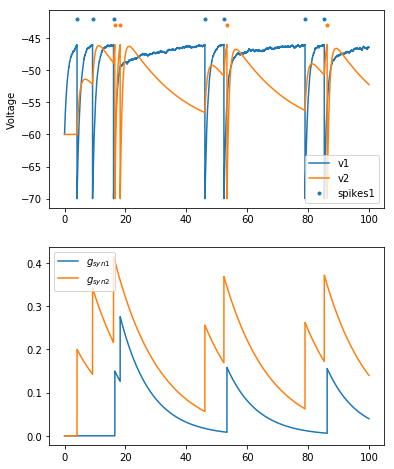

In [7]:
Vreset=-70; Vrep=-60
tau=1; th=-46
tau_syn1=10; Esyn1=-60;
tau_syn2=15; Esyn2=0

def LIF(X,I):
    v1,gsyn1,v2,gsyn2=X
    return np.array([-(v1-Vrep)/tau - gsyn1*(v1-Esyn1)+ I,
                     -gsyn1/tau_syn1,
                    -(v2-Vrep)/tau - gsyn2*(v2-Esyn2),
                     -gsyn2/tau_syn2])

tstop=100; dt=0.01
time=np.arange(0,tstop,dt)

#En este modelo habrá un input en forma de corriente aleatoria sólo sobre la neurona 1
meanI = 14; sdI = 2
Istim = np.random.normal(meanI,sdI,size=len(time))

Wsyn12=0.2; Wsyn21=0.15

v=-60.
n=0.
X=np.array([v,n,v,n])  #inicializamos ambas neuronas iguales
X_t=np.zeros((len(time),4)) #Vamos a guardar el curso temporal del voltage y g_syn

spikes1=[]; spikes2=[]

for i,t in enumerate(time):
    X_t[i]=X
    X+=dt*LIF(X,Istim[i])
    
    if X[0]>=th:       #verificamos disparos de la neurona 1
        X[0] = Vreset
        X[3] = X[3] + Wsyn12  #cuando la neurona 1 dispara, g_syn2 debe aumentar
        spikes1.append(t)
    if X[2]>=th:       #verificamos disparos de la neurona 2
        X[2] = Vreset
        X[1] = X[1] + Wsyn21  #cuando la neurona 2 dispara, g_syn1 debe aumentar    
        spikes2.append(t)

plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(time,X_t[:,0])
plt.plot(time,X_t[:,2])
plt.ylabel("Voltage")
#plt.plot(input_spikes[:-1],-40*np.ones_like(input_spikes[:-1]),'r.')
plt.plot(spikes1,-42*np.ones_like(spikes1),'C0.')
plt.plot(spikes2,-43*np.ones_like(spikes2),'C1.')
plt.legend(("v1","v2","spikes1"))

plt.subplot(212)

plt.plot(time,X_t[:,1])
plt.plot(time,X_t[:,3])
plt.legend(("$g_{syn1}$","$g_{syn2}$"))



In the previous plot, blue spikes correspond with increments in _orange_ $g_{syn}$ and viceversa
- Change the axis or zoom in the plot to see what happens to $v_1$ each time there is a firing in $2$ and viceversa. Why the effect on $v_1$ is not as evident as in $g_{syn,1}$?. Is there a parameter change that can make this more notorious?
- How can you tell from the plot that $\tau_{syn,1}\neq \tau_{syn,2}$ ?
- Study the behavior of the model when `meanI=25`. Compare to `meanI=25; Wsyn21=0`. Explain.
- Study the behavior of the model when `meanI=14; Esyn1=Esyn2=0`. Compare to `meanI=14; Esyn1=-60; Esyn2=0`. Explain.